In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import os

data = 'balanced_05_vel05_pringles_amax_12_32/'
path = '/home/luiz/my_projects/crazyflie/crazyflie_controller/src/data/csv_data/' + data
save_image_path = '/home/luiz/my_projects/crazyflie/crazyflie_controller/src/data/images/' + data + 'position/'

save_flag = True
cut_data = True

if not os.path.exists(save_image_path):
    os.makedirs(save_image_path)

### CSV's available
# control_ref.csv
# control_sent.csv
# desired_position.csv
# desired_velocity.csv
# orientation_optitrack.csv
# pitch_roll_crazyflie.csv
# position_gaussian_error.csv
# position_kalman.csv
# position_optitrack.csv
# reference_vel.csv
# thrust_crazyflie.csv
# time.csv
# vel_crazyflie.csv
# vel_kalmam.csv
# vel_optitrack.csv
# yaw_angle_crazyflie.csv
# z_crazyflie.csv

# Load the data from CSV files
time = os.path.join(path, 'time.csv')

### Position
desired_position_path = os.path.join(path, 'desired_position.csv')
position_optitrack_path = os.path.join(path, 'position_optitrack.csv')
position_kalman_path = os.path.join(path, 'position_kalman.csv')
position_gaussian_error_path = os.path.join(path, 'position_gaussian_error.csv')

### Velocity
desired_velocity_path = os.path.join(path, 'desired_velocity.csv')
vel_optitrack_path = os.path.join(path, 'vel_optitrack.csv')
vel_kalman_path = os.path.join(path, 'vel_kalmam.csv')
vel_crazyflie_path = os.path.join(path, 'vel_crazyflie.csv')

### Orientation
orientation_optitrack_path = os.path.join(path, 'orientation_optitrack.csv')
yaw_angle_crazyflie_path = os.path.join(path, 'yaw_angle_crazyflie.csv')

# Load the data from CSV files
time = pd.read_csv(time)
desired_position = pd.read_csv(desired_position_path)
position_optitrack = pd.read_csv(position_optitrack_path)
position_kalman = pd.read_csv(position_kalman_path)
position_gaussian_error = pd.read_csv(position_gaussian_error_path)
desired_velocity = pd.read_csv(desired_velocity_path)
vel_optitrack = pd.read_csv(vel_optitrack_path)
vel_kalman = pd.read_csv(vel_kalman_path)
vel_crazyflie = pd.read_csv(vel_crazyflie_path)

orientation_optitrack = pd.read_csv(orientation_optitrack_path)
yaw_crazyflie = pd.read_csv(yaw_angle_crazyflie_path)

# Tranforming the data into numpy arrays
time = time.values
desired_position = desired_position.values
position_optitrack = position_optitrack.values
position_kalman = position_kalman.values
position_gaussian_error = position_gaussian_error.values
desired_velocity = desired_velocity.values
vel_optitrack_world= vel_optitrack.values
vel_kalman_body = vel_kalman.values
vel_crazyflie_world = vel_crazyflie.values
orientation_optitrack = orientation_optitrack.values
yaw_crazyflie = np.deg2rad(yaw_crazyflie.values)

### Limit the data to a specific time
if cut_data:
    start = 5
    end = 55

    len_time = len(time)
    max_time = time[len_time-1]

    start_index = int(start*len_time/max_time)
    end_index = int(end*len_time/max_time)

    time = np.array(time[start_index:end_index])
    desired_position = np.array(desired_position[start_index:end_index])
    position_kalman = np.array(position_kalman[start_index:end_index])
    position_optitrack = np.array(position_optitrack[start_index:end_index])
    position_gaussian_error = np.array(position_gaussian_error[start_index:end_index])

In [2]:
# Find peaks in the desired position
peaks, _ = find_peaks(desired_position[:, 0], height=0.1, distance=100)

# Function to calculate RMSE
def calculate_rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Position

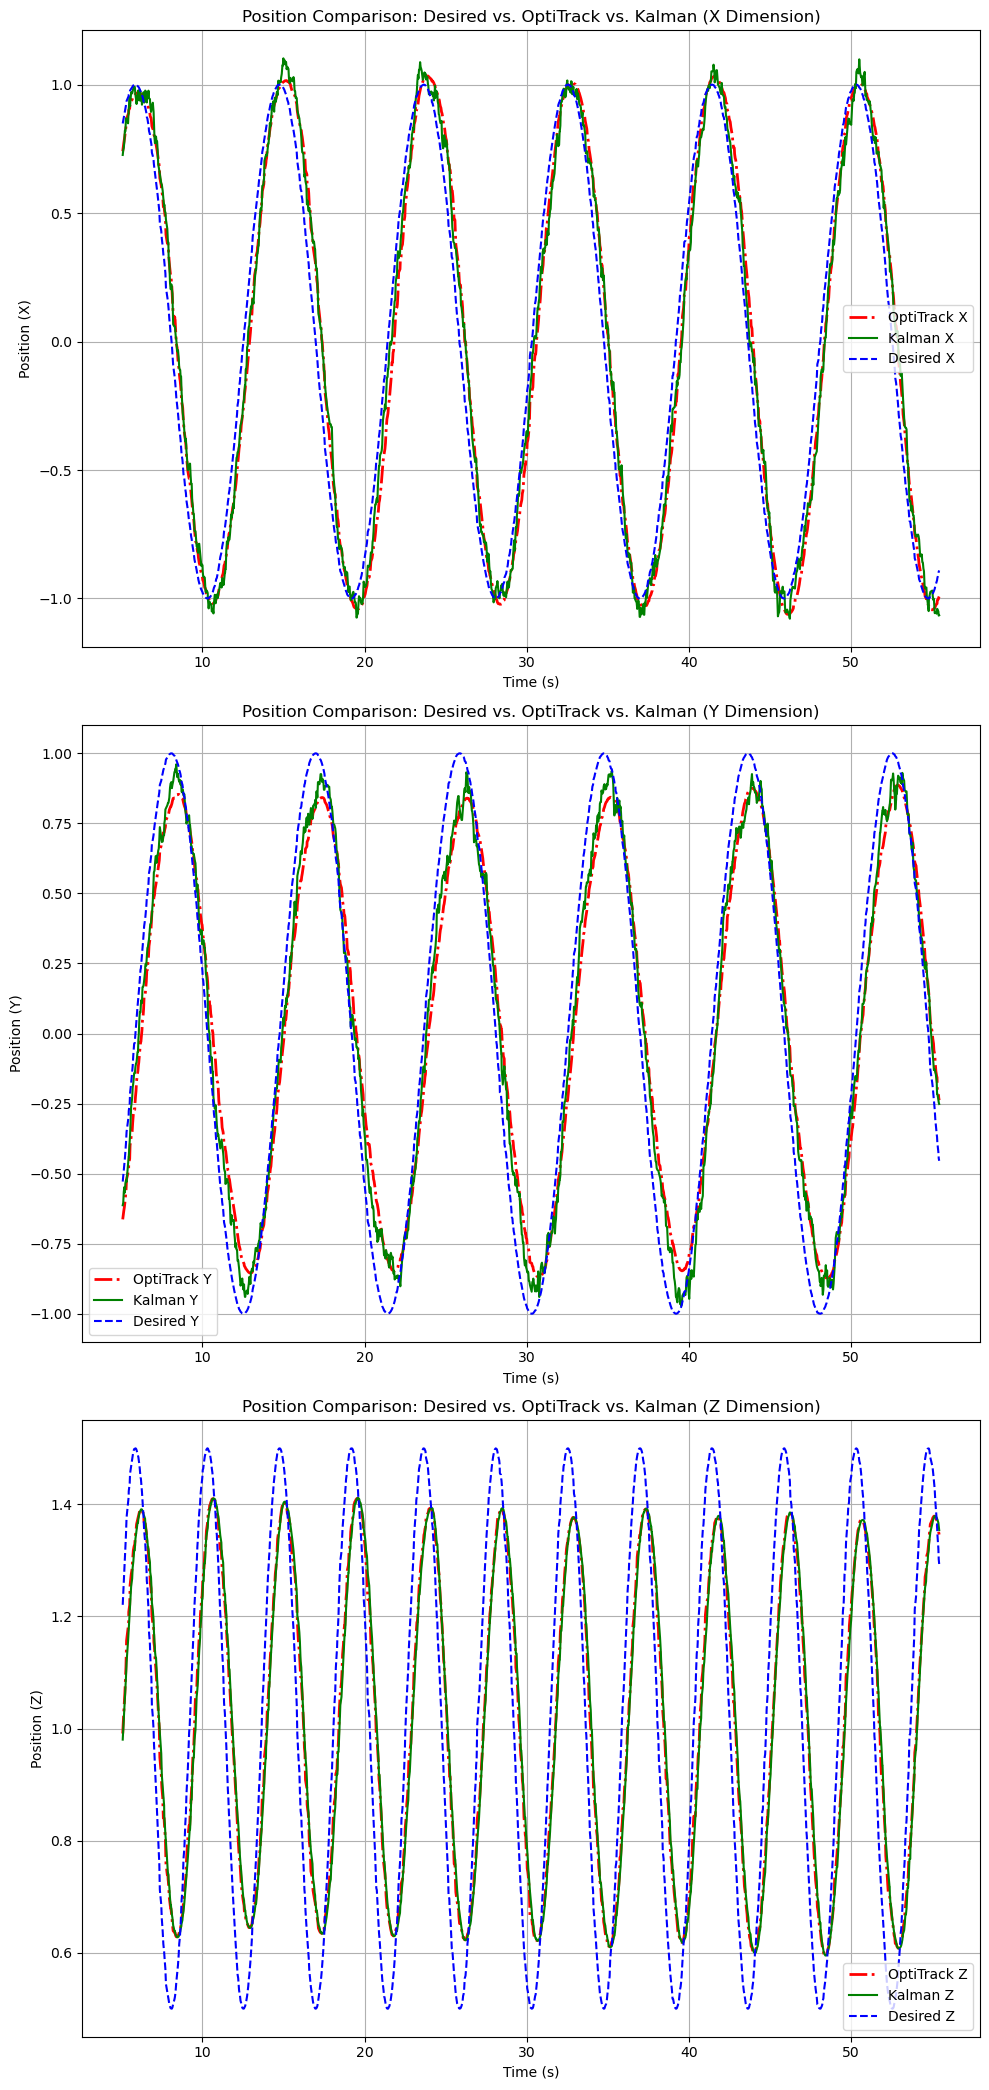

In [3]:
fig, axs = plt.subplots(3, 1, figsize=(10, 21))  # 3 rows, 1 column

# X Dimension
axs[0].plot(time, position_optitrack[:, 0], label='OptiTrack X', linestyle='-.', color='red', alpha=1, linewidth=2)
axs[0].plot(time, position_kalman[:, 0], label='Kalman X', linestyle='-', color='green')
axs[0].plot(time, desired_position[:, 0], label='Desired X', linestyle='--', color='blue')
axs[0].set_title('Position Comparison: Desired vs. OptiTrack vs. Kalman (X Dimension)')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Position (X)')
axs[0].legend()
axs[0].grid(True)

# Y Dimension
axs[1].plot(time, position_optitrack[:, 1], label='OptiTrack Y', linestyle='-.', color='red', alpha=1, linewidth=2)
axs[1].plot(time, position_kalman[:, 1], label='Kalman Y', linestyle='-', color='green')
axs[1].plot(time, desired_position[:, 1], label='Desired Y', linestyle='--', color='blue')
axs[1].set_title('Position Comparison: Desired vs. OptiTrack vs. Kalman (Y Dimension)')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Position (Y)')
axs[1].legend()
axs[1].grid(True)

# Z Dimension
axs[2].plot(time, position_optitrack[:, 2], label='OptiTrack Z', linestyle='-.', color='red', alpha=1, linewidth=2)
axs[2].plot(time, position_kalman[:, 2], label='Kalman Z', linestyle='-', color='green')
axs[2].plot(time, desired_position[:, 2], label='Desired Z', linestyle='--', color='blue')
axs[2].set_title('Position Comparison: Desired vs. OptiTrack vs. Kalman (Z Dimension)')
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Position (Z)')
axs[2].legend()
axs[2].grid(True)

# Adjust layout
plt.tight_layout()

if save_flag:
    vectorized_image_path = 'position_comparison.svg'
    full_vectorized_image_path = os.path.join(save_image_path, vectorized_image_path)
    plt.savefig(full_vectorized_image_path, format='svg')

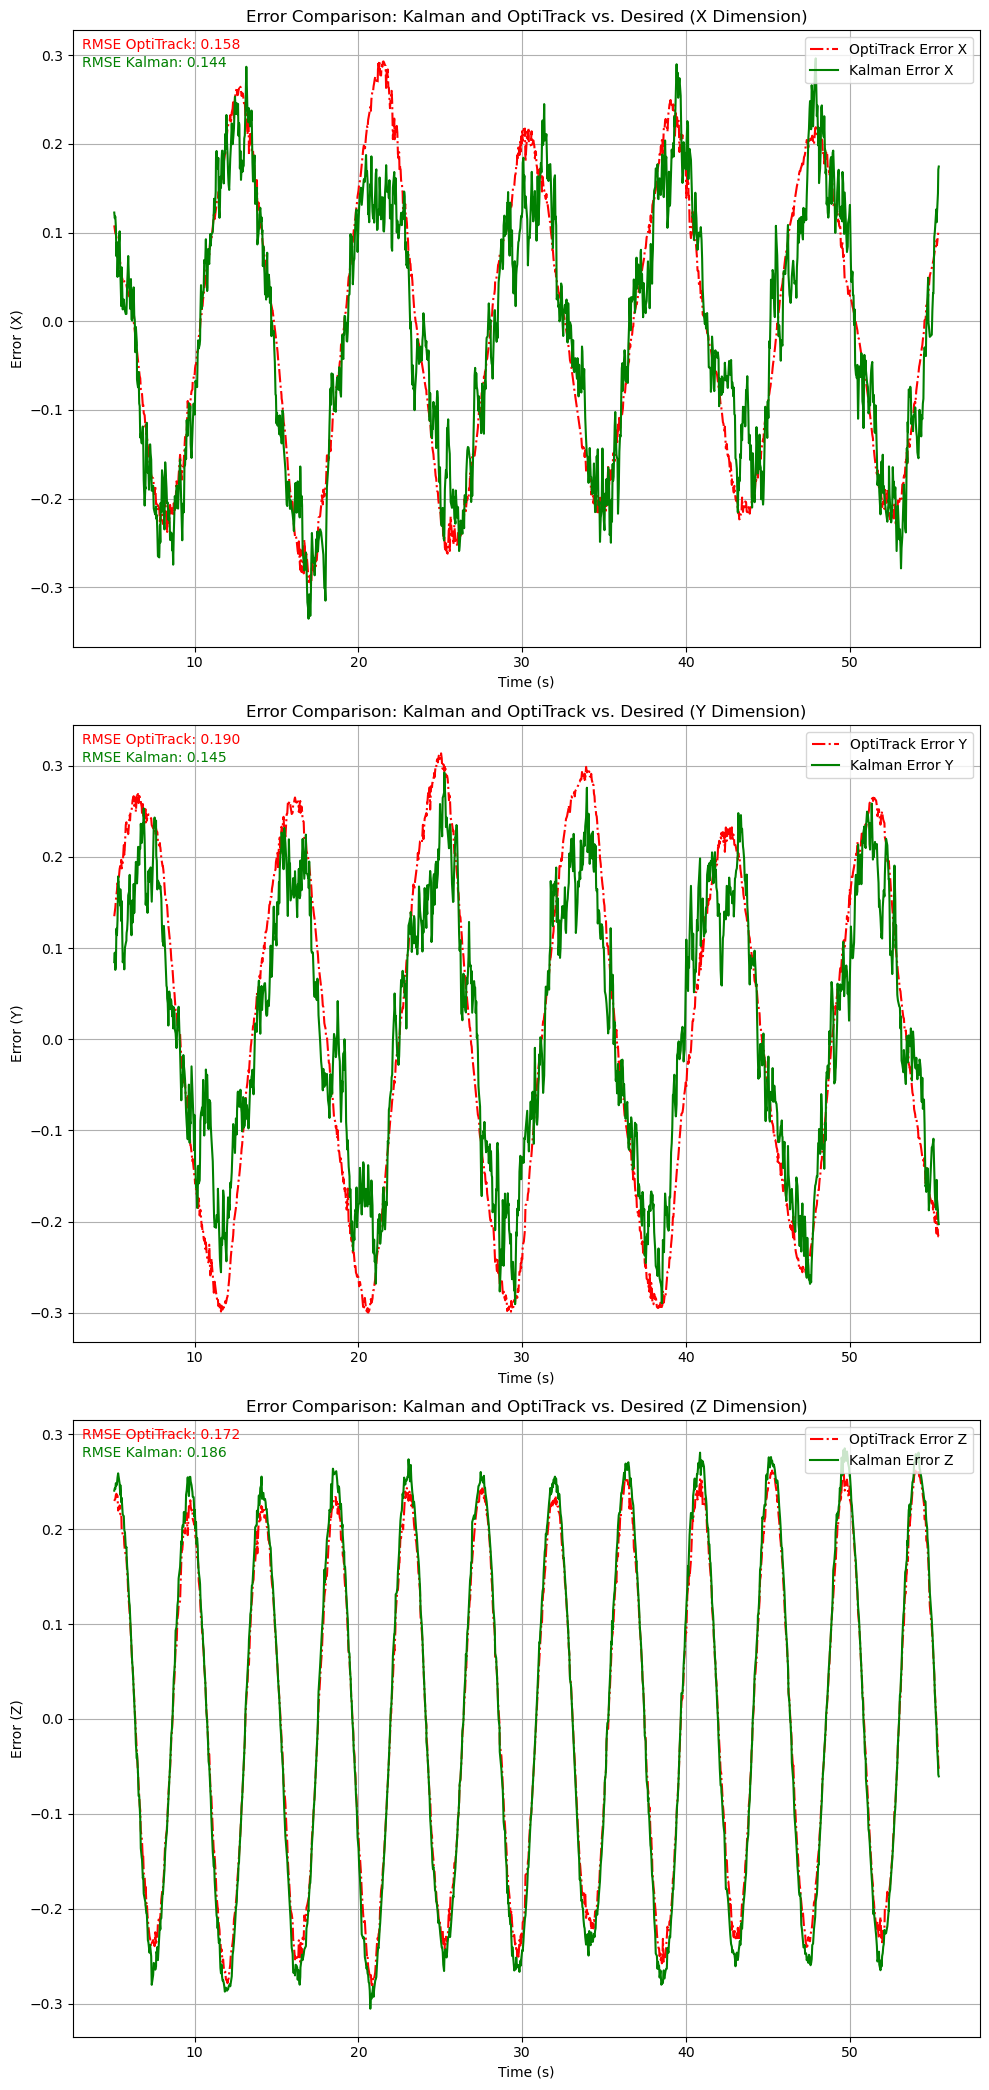

In [4]:
# Calculating errors
error_kalman = desired_position - position_kalman
error_optitrack = desired_position - position_optitrack

# Calculating RMSE for each dimension
rmse_kalman = [calculate_rmse(desired_position[:, i], position_kalman[:, i]) for i in range(3)]
rmse_optitrack = [calculate_rmse(desired_position[:, i], position_optitrack[:, i]) for i in range(3)]

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(10, 21))  # 3 rows, 1 column for X, Y, Z dimensions

dimensions = ['X', 'Y', 'Z']
for i in range(3):
    # Plotting the errors
    axs[i].plot(time, error_optitrack[:, i], label=f'OptiTrack Error {dimensions[i]}', linestyle='-.', color='red')
    axs[i].plot(time, error_kalman[:, i], label=f'Kalman Error {dimensions[i]}', linestyle='-', color='green')
    
    # Annotating RMSE on the plot
    axs[i].annotate(f'RMSE Kalman: {rmse_kalman[i]:.3f}', xy=(0.01, 0.94), xycoords='axes fraction', fontsize=10, color='green')
    axs[i].annotate(f'RMSE OptiTrack: {rmse_optitrack[i]:.3f}', xy=(0.01, 0.97), xycoords='axes fraction', fontsize=10, color='red')
    
    axs[i].set_title(f'Error Comparison: Kalman and OptiTrack vs. Desired ({dimensions[i]} Dimension)')
    axs[i].set_xlabel('Time (s)')
    axs[i].set_ylabel(f'Error ({dimensions[i]})')
    axs[i].grid(True)
    
    # Adjusting the legend location
    axs[i].legend(loc='upper right')

# Adjust layout to not overlap the subplots
plt.tight_layout()

# Assuming save_flag and save_image_path are defined
if save_flag:
    plt.savefig(os.path.join(save_image_path, 'error_comparison_rmse.svg'), format='svg')


# 2D

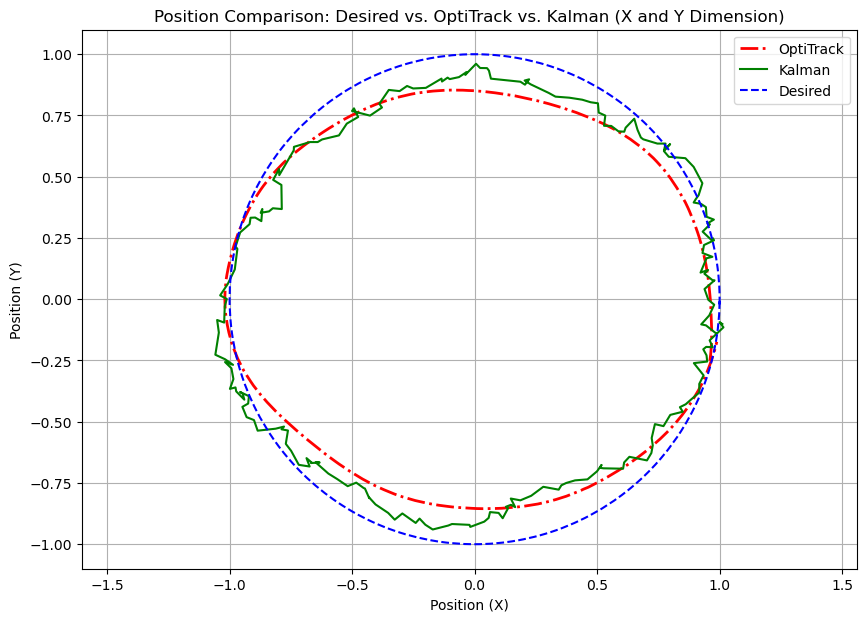

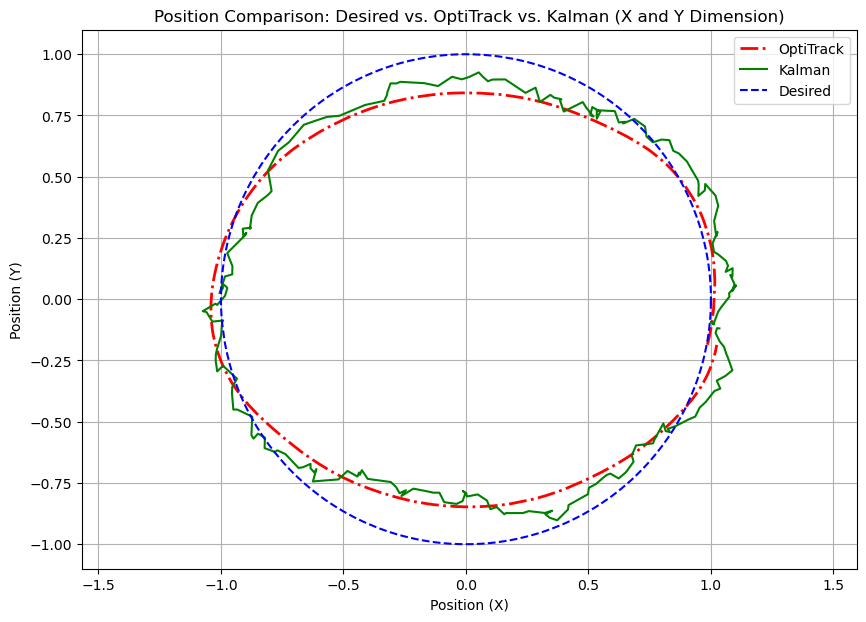

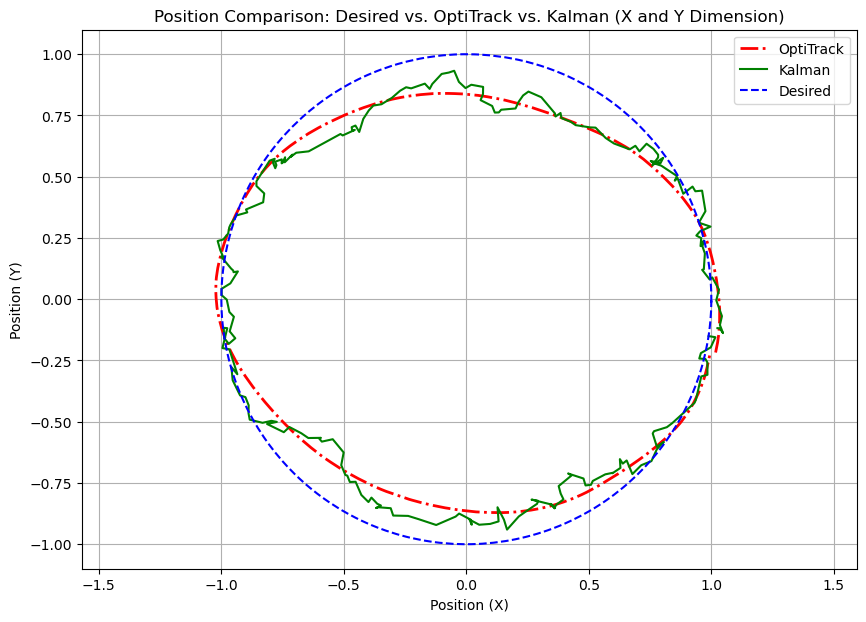

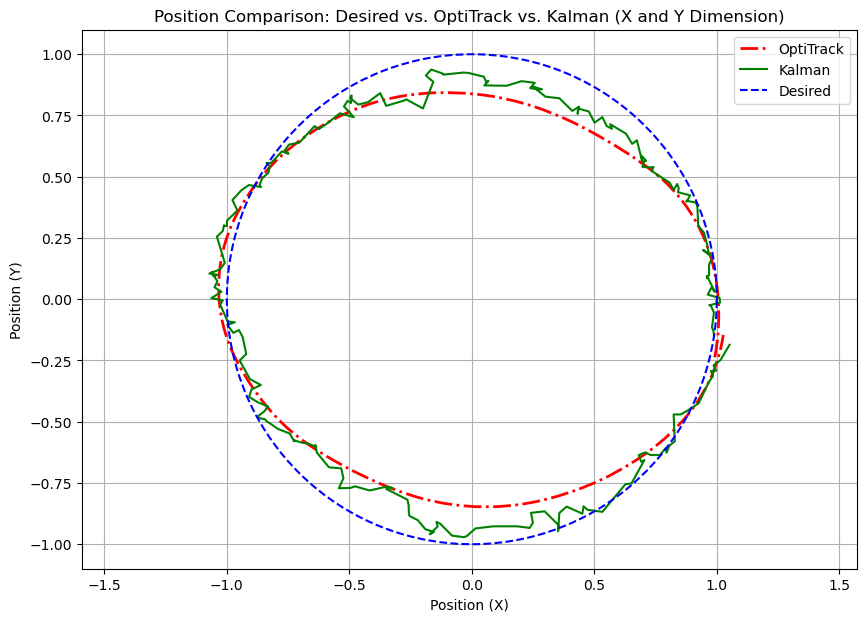

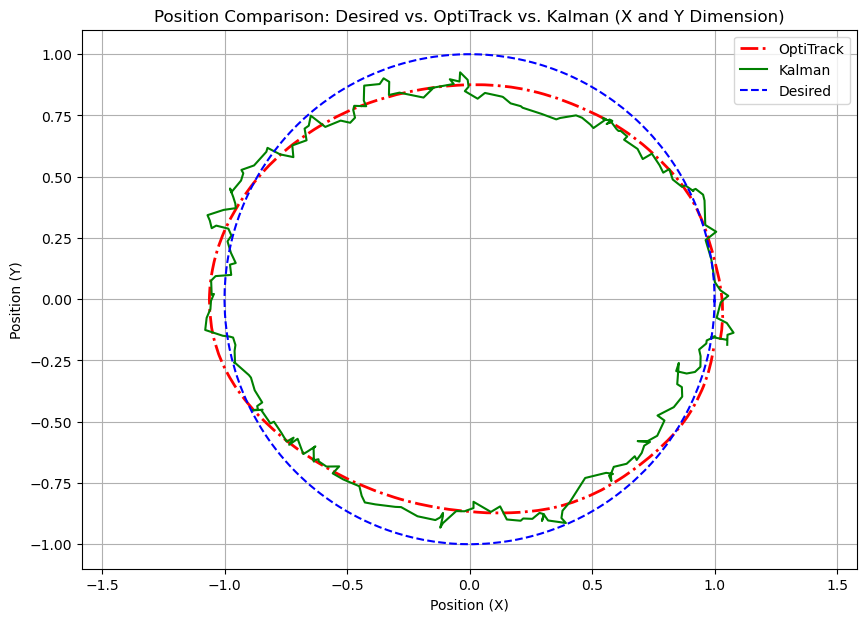

In [5]:
### plotting the x and y simultaniously
# Iterate over consecutive peaks
for i in range(len(peaks) - 1):
    # Cut the data between the current and next peak
    start_index = peaks[i] - 1
    end_index = peaks[i + 1] +1
    
    time_cut = time[start_index:end_index]
    desired_position_cut = desired_position[start_index:end_index]
    position_kalman_cut = position_kalman[start_index:end_index]
    position_optitrack_cut = position_optitrack[start_index:end_index]
    plt.figure(figsize=(10, 7))

    plt.plot(position_optitrack_cut[:, 0], position_optitrack_cut[:, 1], label='OptiTrack', linestyle = '-.',markersize=4, color='red', alpha=1, linewidth=2)
    plt.plot(position_kalman_cut[:, 0], position_kalman_cut[:, 1], label='Kalman', linestyle='-', color='green')
    plt.plot(desired_position_cut[:, 0], desired_position_cut[:, 1], label='Desired', linestyle='--', color='blue')

    plt.title('Position Comparison: Desired vs. OptiTrack vs. Kalman (X and Y Dimension)')
    plt.xlabel('Position (X)')
    plt.ylabel('Position (Y)')
    plt.legend()
    plt.grid(True)

    plt.axis('equal')

    if save_flag:
        vectorized_image_path = f'2D_position_comparison_{i}.svg'
        full_vectorized_image_path = os.path.join(save_image_path, vectorized_image_path)
        plt.savefig(full_vectorized_image_path, format='svg')

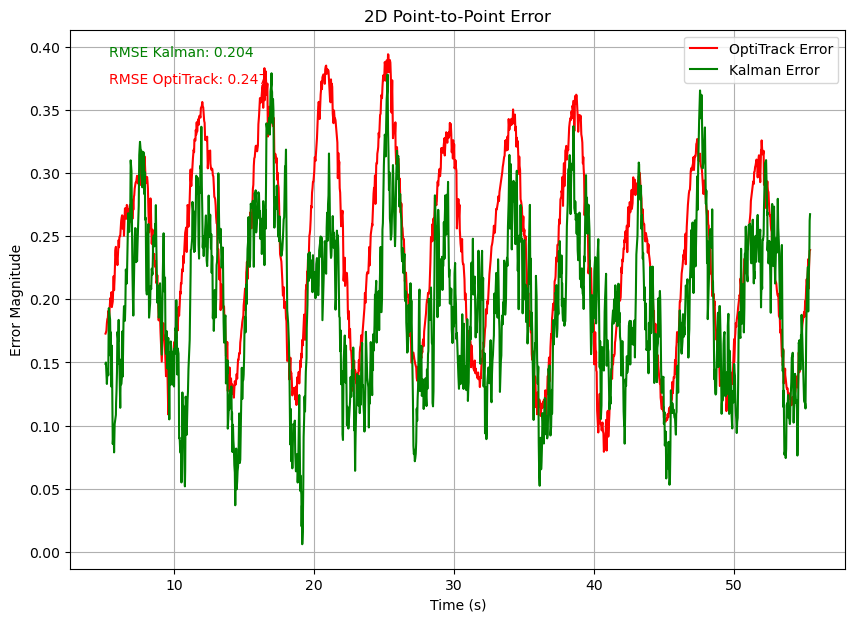

In [6]:
# Calculate the 2D point-to-point errors
point_to_point_error_kalman = np.linalg.norm(position_kalman[:, 0:2] - desired_position[:, 0:2], axis=1)
point_to_point_error_optitrack = np.linalg.norm(position_optitrack[:, 0:2] - desired_position[:, 0:2], axis=1)

# Calculate RMSE for point-to-point error
rmse_kalman_2d = np.sqrt(np.mean(point_to_point_error_kalman**2))
rmse_optitrack_2d = np.sqrt(np.mean(point_to_point_error_optitrack**2))

# Plotting the point-to-point errors
plt.figure(figsize=(10, 7))
plt.plot(time, point_to_point_error_optitrack, label='OptiTrack Error', color='red')
plt.plot(time, point_to_point_error_kalman, label='Kalman Error', color='green')

# Annotate the RMSE on the plot
plt.annotate(f'RMSE OptiTrack: {rmse_optitrack_2d:.3f}', xy=(0.05, 0.90), xycoords='axes fraction', fontsize=10, color='red')
plt.annotate(f'RMSE Kalman: {rmse_kalman_2d:.3f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10, color='green')

plt.title('2D Point-to-Point Error')
plt.xlabel('Time (s)')
plt.ylabel('Error Magnitude')
plt.legend()
plt.grid(True)

if save_flag:
    vectorized_image_path = '2D_point_to_point_error.svg'
    full_vectorized_image_path = os.path.join(save_image_path, vectorized_image_path)
    plt.savefig(full_vectorized_image_path, format='svg')

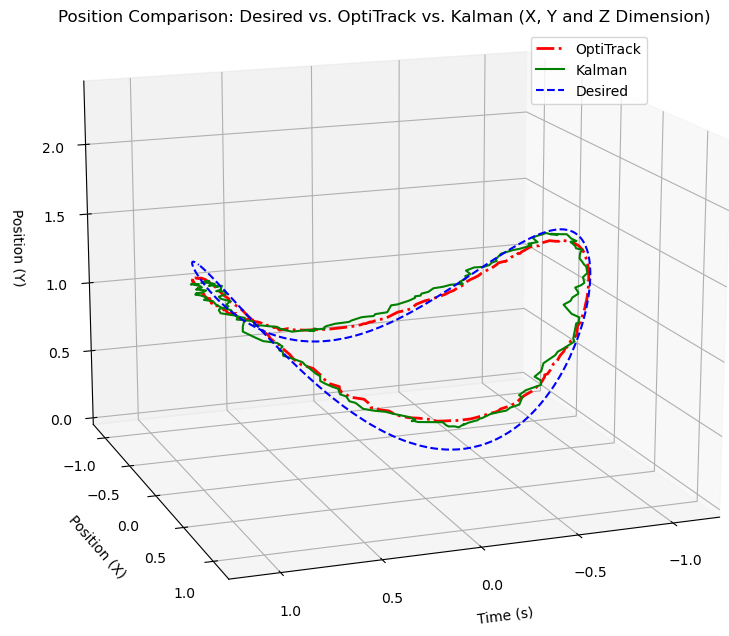

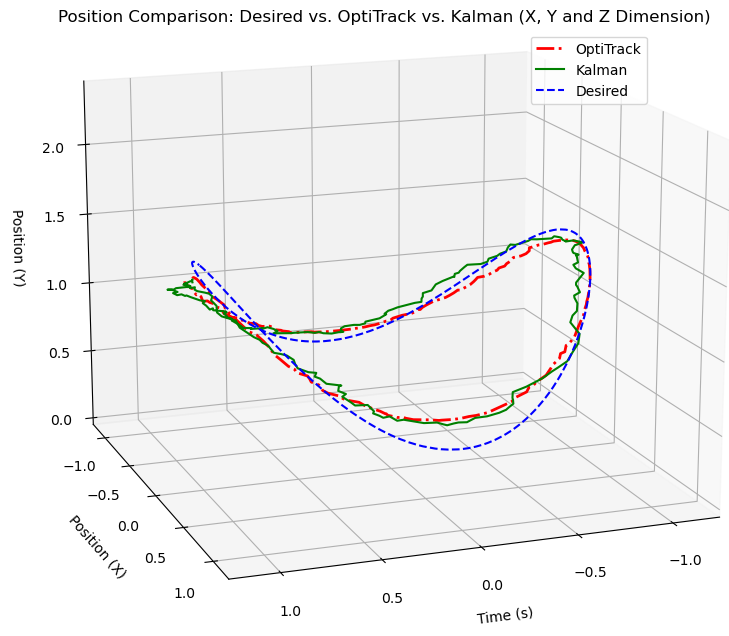

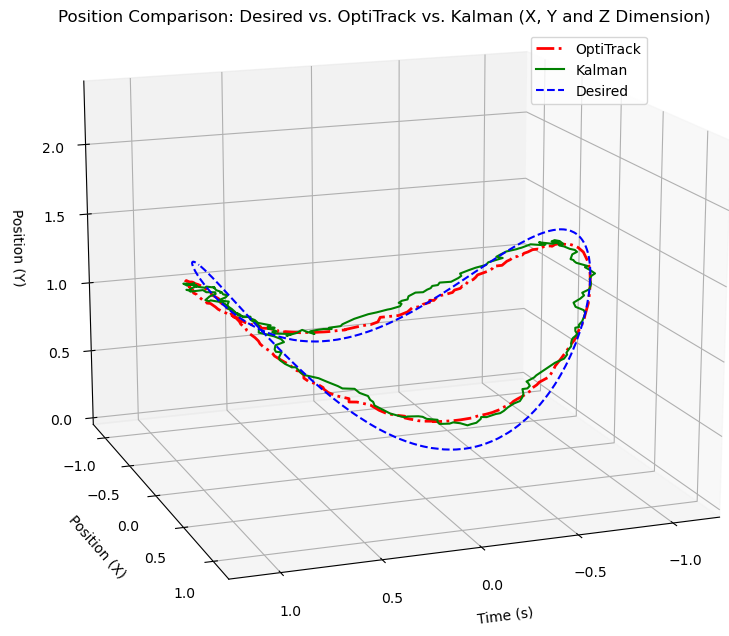

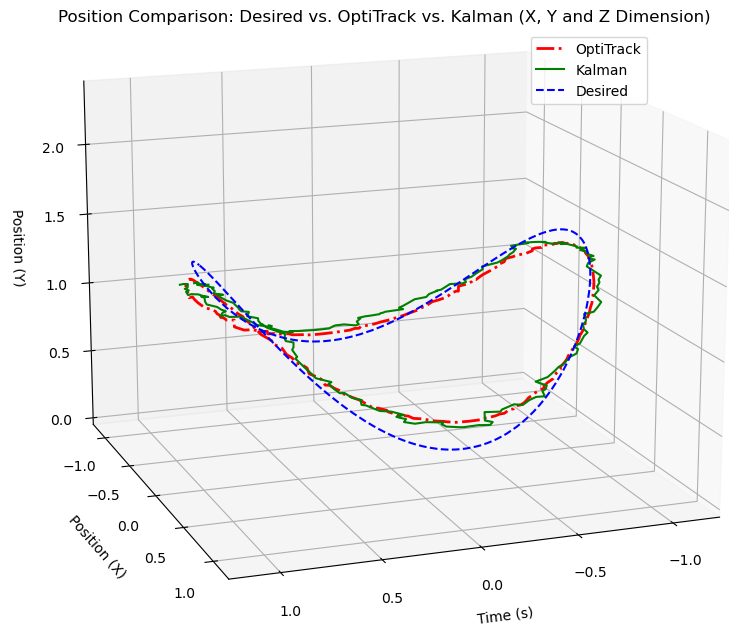

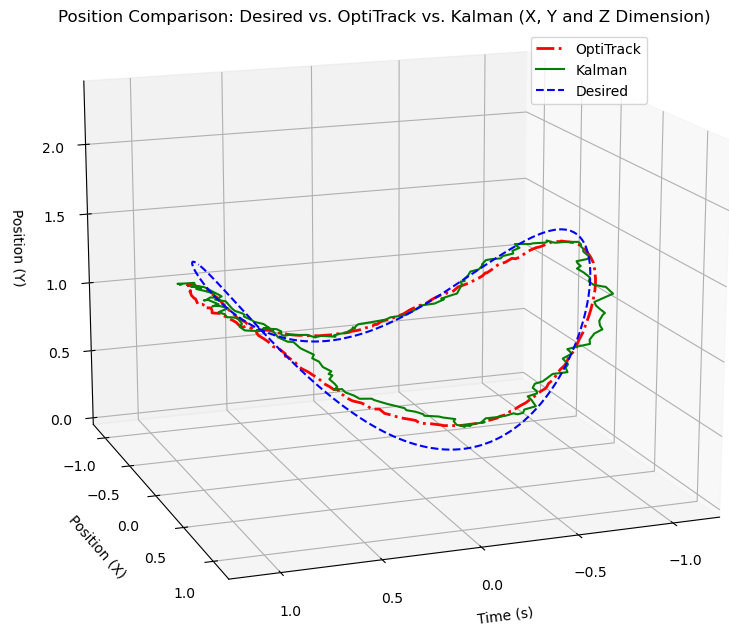

In [7]:
# Iterate over consecutive peaks
for i in range(len(peaks) - 1):
    # Cut the data between the current and next peak
    start_index = peaks[i]
    end_index = peaks[i + 1]
    
    time_cut = time[start_index:end_index]
    desired_position_cut = desired_position[start_index:end_index]
    position_kalman_cut = position_kalman[start_index:end_index]
    position_optitrack_cut = position_optitrack[start_index:end_index]
    
    # Creating a 3D plot for cut position comparison
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    ax.plot(position_optitrack_cut[:, 0], position_optitrack_cut[:, 1], position_kalman_cut[:, 2],label='OptiTrack', linestyle='-.', color='red', alpha=1, linewidth=2)
    ax.plot(position_kalman_cut[:, 0], position_kalman_cut[:, 1], position_kalman_cut[:, 2], label='Kalman', linestyle='-', color='green')
    ax.plot(desired_position_cut[:, 0], desired_position_cut[:, 1], desired_position_cut[:, 2], label='Desired', linestyle='--', color='blue')
    
    ax.set_title('Position Comparison: Desired vs. OptiTrack vs. Kalman (X, Y and Z Dimension)')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Position (X)')
    ax.set_zlabel('Position (Y)')
    
    ax.set_ylim(-1.2, 1.2)
    ax.set_xlim(-1.2, 1.2)
    ax.set_zlim(0, 2.4)
    
    # Change point of view
    ax.view_init(15, 70)
    
    # Zoom
    ax.dist = 7
    
    ax.legend()
    ax.grid(True)

    if save_flag:
        vectorized_image_path = f'3D_position_comparison_{i}.svg'
        full_vectorized_image_path = os.path.join(save_image_path, vectorized_image_path)
        plt.savefig(full_vectorized_image_path, format='svg')


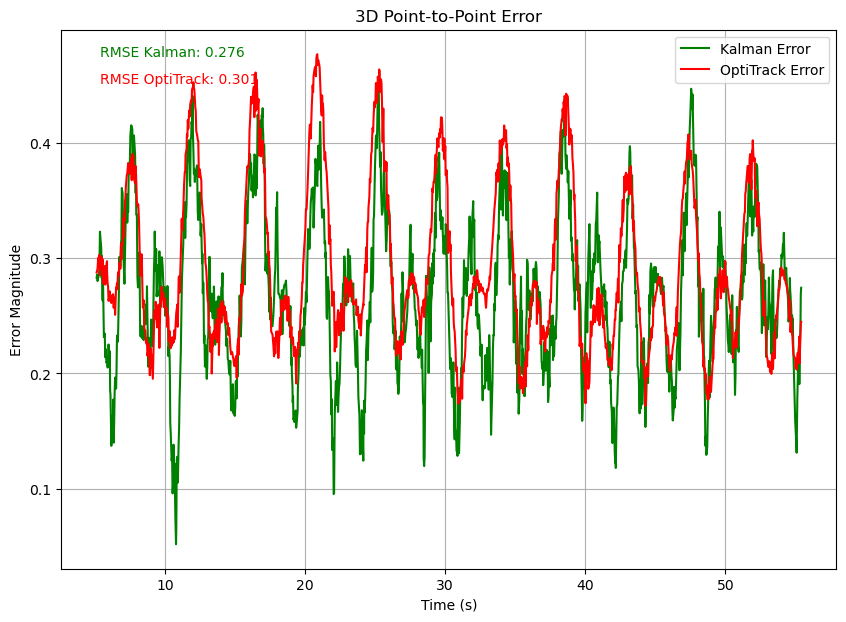

In [8]:
# Calculate the 3D point-to-point errors
point_to_point_error_kalman_3d = np.linalg.norm(position_kalman - desired_position, axis=1)
point_to_point_error_optitrack_3d = np.linalg.norm(position_optitrack - desired_position, axis=1)

# Calculate RMSE for point-to-point error
rmse_kalman_3d = np.sqrt(np.mean(point_to_point_error_kalman_3d**2))
rmse_optitrack_3d = np.sqrt(np.mean(point_to_point_error_optitrack_3d**2))

# Plotting the point-to-point errors
plt.figure(figsize=(10, 7))
plt.plot(time, point_to_point_error_kalman_3d, label='Kalman Error', color='green')
plt.plot(time, point_to_point_error_optitrack_3d, label='OptiTrack Error', color='red')

# Annotate the RMSE on the plot
plt.annotate(f'RMSE Kalman: {rmse_kalman_3d:.3f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10, color='green')
plt.annotate(f'RMSE OptiTrack: {rmse_optitrack_3d:.3f}', xy=(0.05, 0.90), xycoords='axes fraction', fontsize=10, color='red')

plt.title('3D Point-to-Point Error')
plt.xlabel('Time (s)')
plt.ylabel('Error Magnitude')
plt.legend()
plt.grid(True)

if save_flag:
    vectorized_image_path = '3D_point_to_point_error.svg'
    full_vectorized_image_path = os.path.join(save_image_path, vectorized_image_path)
    plt.savefig(full_vectorized_image_path, format='svg')